# Setting

In [21]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

# Lettura dataset

In [22]:
df = pd.read_csv("data/globaltemperatures.csv")
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072


# Preprocessing

## Caratteristiche principali

In [23]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty
count,3180.000000,3180.000000
mean,8.374731,0.938468
std,4.381310,1.096440
min,-2.080000,0.034000
25%,4.312000,0.186750
50%,8.610500,0.392000
75%,12.548250,1.419250
max,19.021000,7.880000


## Verifica duplicati

In [24]:
sum(df.duplicated())

0

## Verifica missing values

In [25]:
df.isna().sum()

# vedi progetto tiem series per sistemazione

dt                                    0
LandAverageTemperature               12
LandAverageTemperatureUncertainty    12
dtype: int64

In [26]:
df[df.isna().any(axis=1)]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
10,1750-11-01,NaN,NaN
16,1751-05-01,NaN,NaN
18,1751-07-01,NaN,NaN
21,1751-10-01,NaN,NaN
22,1751-11-01,NaN,NaN
23,1751-12-01,NaN,NaN
25,1752-02-01,NaN,NaN
28,1752-05-01,NaN,NaN
29,1752-06-01,NaN,NaN
30,1752-07-01,NaN,NaN


## Correzione missing values

## Feature engineering

In [27]:
# sistemazione formato campo data

df['dt'] = pd.to_datetime(df['dt'], format='%Y/%m/%d')
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072
...,...,...,...
3187,2015-08-01,14.755,0.072
3188,2015-09-01,12.999,0.079
3189,2015-10-01,10.801,0.102
3190,2015-11-01,7.433,0.119


In [28]:
# aggiungere altre feature come mese

df['month'] = df['dt'].dt.month
df['year'] = df['dt'].dt.year
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,month,year
0,1750-01-01,3.034,3.574,1,1750
1,1750-02-01,3.083,3.702,2,1750
2,1750-03-01,5.626,3.076,3,1750
3,1750-04-01,8.490,2.451,4,1750
4,1750-05-01,11.573,2.072,5,1750
...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,8,2015
3188,2015-09-01,12.999,0.079,9,2015
3189,2015-10-01,10.801,0.102,10,2015
3190,2015-11-01,7.433,0.119,11,2015


In [29]:
df.set_index('dt', inplace=True)
# df = df[['LandAverageTemperature']]
# df

# Esplorazione

## Serie storica a diverse granularità

In [30]:
# livello mensile

fig = px.line(df, x=df.index, y="LandAverageTemperature", title='Livello mensile')
fig.show()

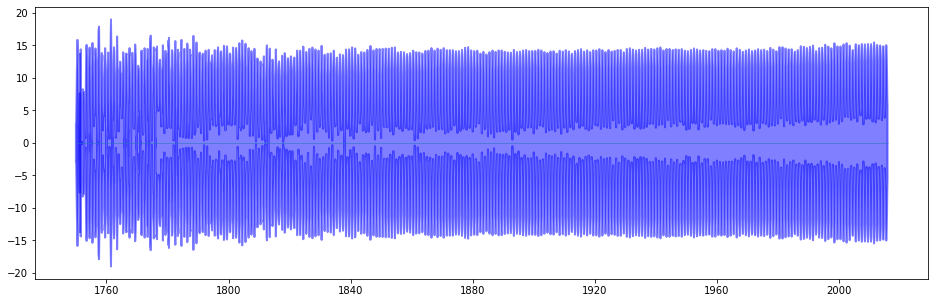

In [31]:
# grafico a specchio a livello mensile

import numpy as np

plt.figure(figsize=(16,5))
plt.fill_between(df.index, y1=df['LandAverageTemperature'], y2=-df['LandAverageTemperature'], alpha=0.5, linewidth=2, color='blue')
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

In [32]:
# livello annuale

df_year = df[['LandAverageTemperature']].resample("Y").sum()
fig = px.line(df_year, x=df_year.index, y="LandAverageTemperature", title='Livello annuale')
fig.show()

## Analisi distribuzione variabile di interesse

D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



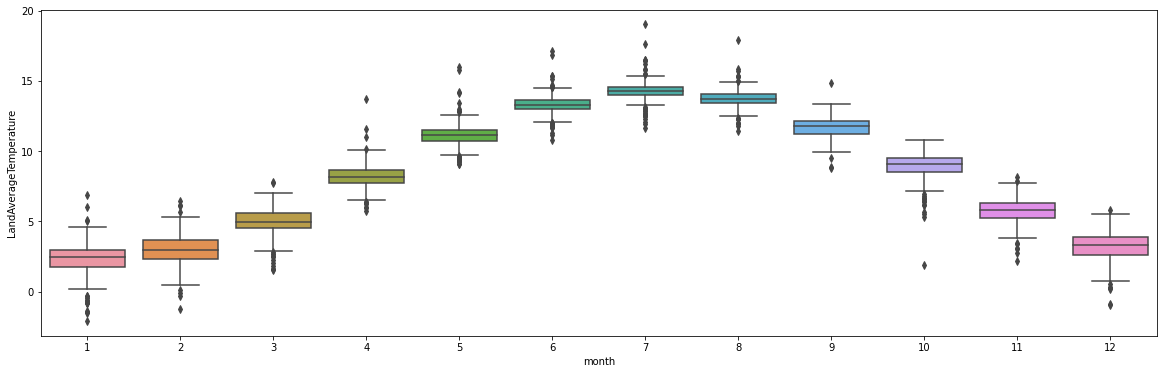

In [33]:
# a livello mensile

fig, ax = plt.subplots(figsize=(20, 6))

sns.boxplot(df['month'], df['LandAverageTemperature'])
ax.set_xlabel('month')
ax.set_ylabel('LandAverageTemperature')

plt.show()

# si nota già qui una stagionalità mensile

## Analisi autocorrelazione

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(20,6))
plot_acf(df.value.tolist(), lags=25, ax=axes[0])
plot_pacf(df.value.tolist(), lags=25, ax=axes[1])
plt.show()

## Decomposizione

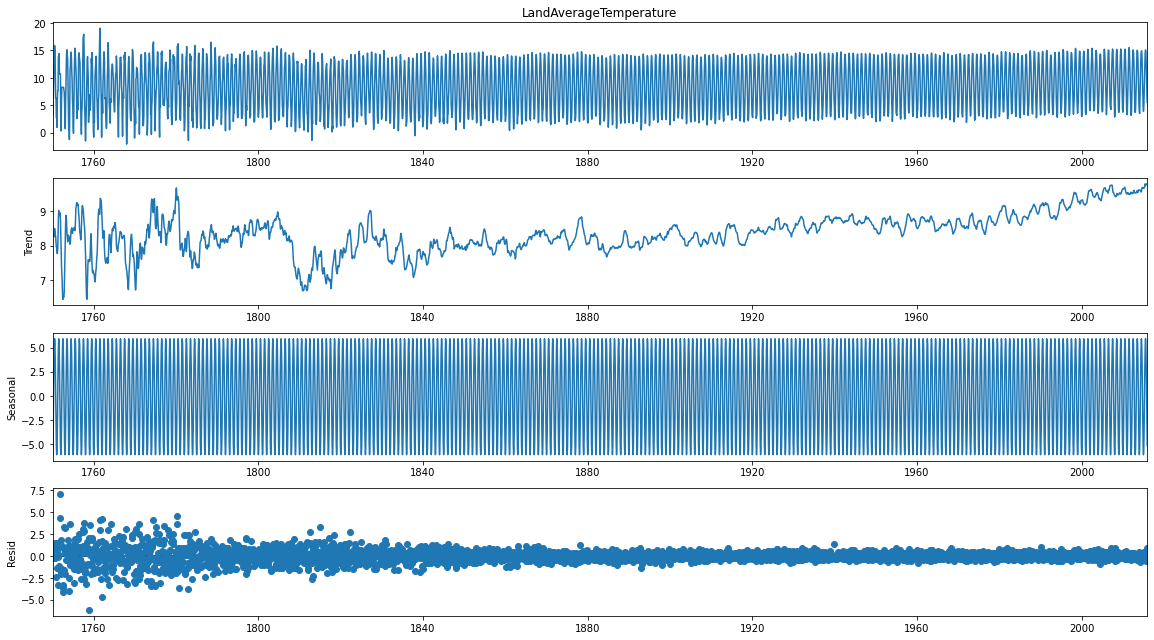

In [34]:
# decomposizione

df_test = df.ffill()

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition
result_add = seasonal_decompose(df_test['LandAverageTemperature'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (16, 9)})
result_add.plot()
plt.show()

In [35]:
# There is clearly an upward trend in the Earth's temperature over the last 150 years. But what if this increase is caused by warming only in underpopulated places like Antarcticaor Siberia? Let's examine such graphs for some cities!


### Analisi tendenza

<AxesSubplot:xlabel='dt'>

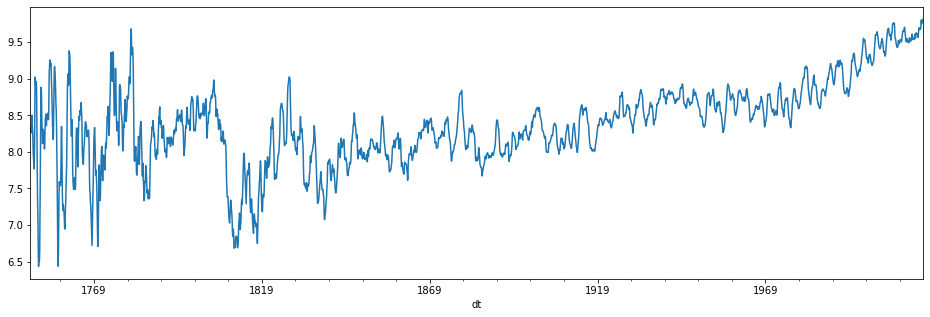

In [36]:
plt.figure(figsize=(16,5))
result_add.trend.plot(legend=False)

In [37]:
result_add.trend

dt
1750-01-01    8.331978
1750-02-01    8.317544
1750-03-01    8.303111
1750-04-01    8.288678
1750-05-01    8.274245
                ...   
2015-08-01    9.766115
2015-09-01    9.777700
2015-10-01    9.789285
2015-11-01    9.800871
2015-12-01    9.812456
Name: trend, Length: 3192, dtype: float64

### Analisi stagionalità

<AxesSubplot:xlabel='dt'>

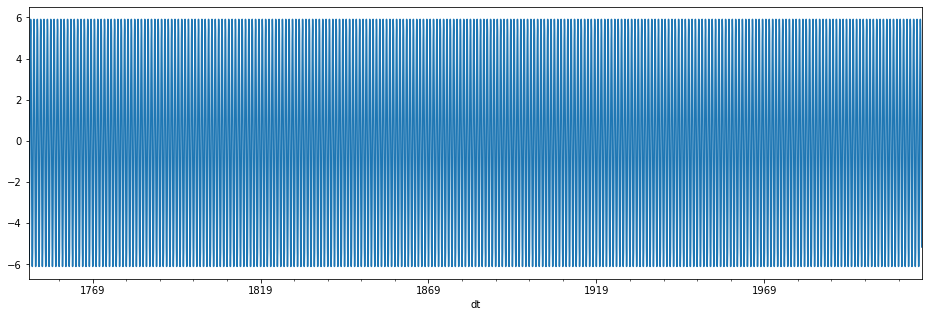

In [38]:
plt.figure(figsize=(16,5))
result_add.seasonal.plot(legend=False)

In [39]:
result_add.seasonal

dt
1750-01-01   -6.097202
1750-02-01   -5.420535
1750-03-01   -3.415553
1750-04-01   -0.124626
1750-05-01    2.754980
                ...   
2015-08-01    5.363052
2015-09-01    3.333349
2015-10-01    0.514498
2015-11-01   -2.614166
2015-12-01   -5.150785
Name: seasonal, Length: 3192, dtype: float64

# Regressione lineare del trend

In [ ]:
# Per fare regressione lineare di una timeseries è conveniente trasformare l'indice (l'asse X) in un numero che indica il numero di periodi passati dal momento inziale.

In [40]:
from sklearn.linear_model import LinearRegression

## Preparazione dati

In [41]:
trend_df = pd.DataFrame()
trend_df['y'] = result_add.trend
trend_df = trend_df.reset_index()
trend_df['x'] = list(range(1,3193,1))
trend_df = trend_df[['x', 'y']]

In [42]:
trend_df

,x,y
0,1,8.331978
1,2,8.317544
2,3,8.303111
3,4,8.288678
4,5,8.274245
...,...,...
3187,3188,9.766115
3188,3189,9.777700
3189,3190,9.789285
3190,3191,9.800871


## Implementazione modello

In [43]:
model = LinearRegression()

In [44]:
x = trend_df['x'].values
y = trend_df['y'].values

In [45]:
x = x.reshape(3192, 1)
y = y.reshape(3192, 1)

In [46]:
model  = model.fit(x, y)

## Risultati

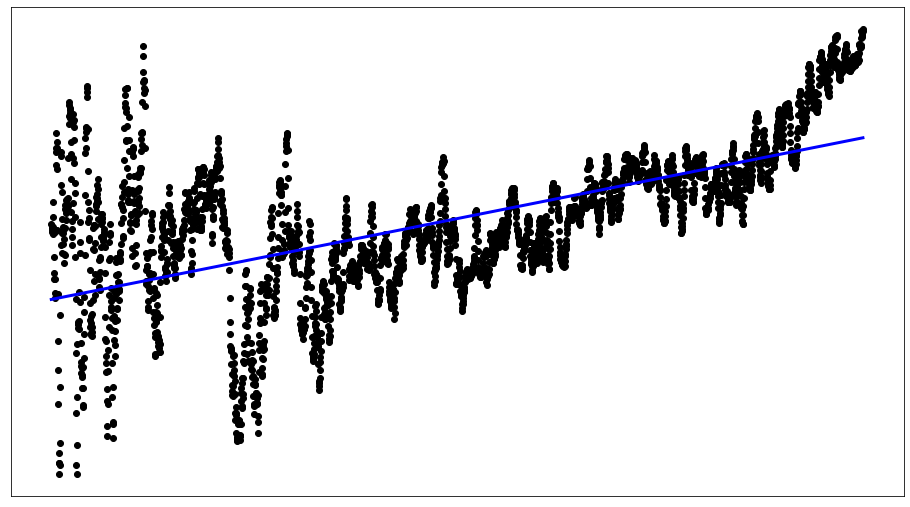

In [47]:
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# Previsioni con ARIMA

In [106]:
# autoarima
# !pip3 install pmdarima
import pmdarima as pm

  Using cached pmdarima-1.8.5-cp39-cp39-win_amd64.whl (601 kB)


## Preparazione dati

In [51]:
df_arima = df[['LandAverageTemperature']]
df_arima

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


## Verifica stazionarietà

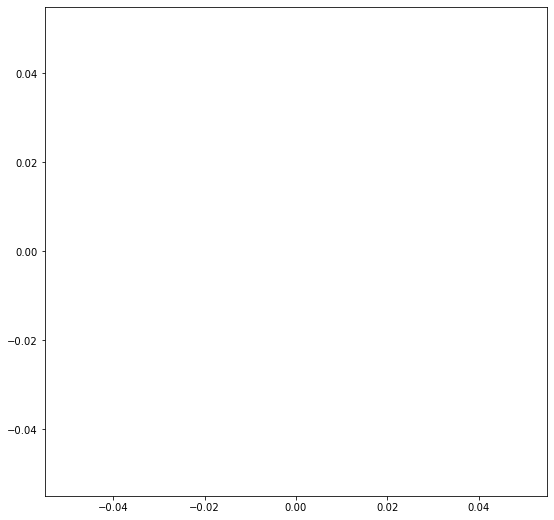

In [56]:
# non stazionarietà in varianza

# plt.rcParams["figure.figsize"] = (9,9)

d1 = df_arima.resample('M').mean()
x = list(d1['LandAverageTemperature'])

d2 = df_arima.resample('M').std()
y = list(d2['LandAverageTemperature'])  # tutti nan???

plt.scatter(x, y)
plt.show()


# eventuale correzione

In [ ]:
# non stazionarietà in media

from statsmodels.tsa.stattools import adfuller

result = adfuller(df_arima['LandAverageTemperature'],
                  autolag = 'AIC',  # autolag: If “AIC” (default) or “BIC”, then the number of lags is chosen to minimize the corresponding information criterion
                  regression= 'n')  # regression: “n” : no constant, no trend
print('p-value: %f' % result[1])


# eventuale correzione

## Divisione in train e test

In [ ]:
# selezionare data di split

df_train = df_arima[df_arima.index < '2005-02-01'].copy()['LandAverageTemperature']

df_test = df_arima[df_arima.index >= '2005-02-01'].copy()['LandAverageTemperature']

## Implementazione modello

In [ ]:
smodel = pm.auto_arima(df_arima, start_p=1, start_q=1,
                       test='adf',
                       max_p=3, max_q=3, m=12,
                       start_P=0, seasonal=True,
                       d=None, D=1, trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=9.96 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3289.049, Time=0.36 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-5788.949, Time=3.96 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=7.00 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3287.647, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-4100.120, Time=0.62 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-6503.123, Time=13.75 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=29.24 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=10.41 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2580.107, Time=4.17 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-8730.628, Time=25.90 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-8050.564, Time=7.66 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=-8634.030, Time=32.44 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.10 sec
 ARIMA(3,0,0)(2,1,0)[12] interce

## Previsioni

In [ ]:
# Forecast su date nuove
n_periods = 120  # prossimi 10 anni = 120 mesi = 120 obs
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_arima.index[-1], periods=n_periods, freq='M')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(16, 7))

plt.plot(df_arima)
plt.plot(future, color='red')

plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

# Previsioni con Prophet

In [ ]:
# non è necessario rendere stazionaria la serie

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error